<span style="color: gray; font-size: 350%; font-weight: bold;">House Price Random Forest & Linear Regression:</span>


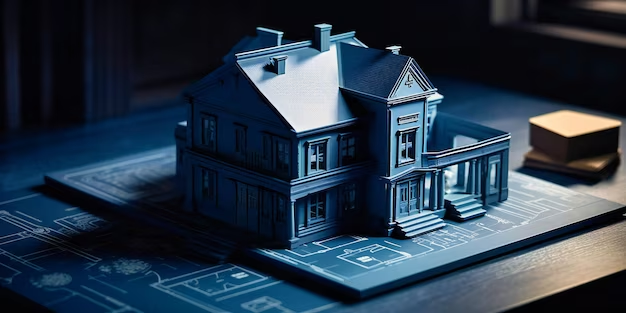

- Auther: Muhammad Tayyab Ali
- Github: https://github.com/TayyabAli92
- Kaggle: https://www.kaggle.com/tayyabli

<span style="color: gray; font-size: 350%; font-weight: bold;">Import Laibraries:</span>

In [30]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns 
from math import sqrt

# To preprocess the data
from sklearn.preprocessing import LabelEncoder

# machine learning
from sklearn.model_selection import train_test_split

# for regressor task
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

<span style="color: gray; font-size: 350%; font-weight: bold;">Data Loading:</span>

In [31]:
# load the dataset
train = pd.read_csv(r'./data/train (1).csv')
test = pd.read_csv(r'./data/test (1).csv')
submission = pd. read_csv(r'./data/sample_submission.csv')

<span style="color: gray; font-size: 350%; font-weight: bold;">Data Analysis:</span>

In [32]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [34]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [35]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [38]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [39]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

<span style="color: gray; font-size: 350%; font-weight: bold;">Missing Values Imputiong:</span>

In [40]:
# missing value imputation for categorical columns
a=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond']
for i in a:
    train[i]=train[i].fillna(train[i].mode()[0])
    test[i]=test[i].fillna(test[i].mode()[0])

c=['MSZoning','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType']
for i in c:
    test[i]=test[i].fillna(test[i].mode()[0])

In [41]:

# missing values in numerical columns
b=['LotFrontage','MasVnrArea','GarageYrBlt']
for i in b:
    train[i]=train[i].fillna(train[i].mean())
    test[i]=test[i].fillna(test[i].mean())

d=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea']
for i in d:
    test[i]=test[i].fillna(test[i].mean())

In [42]:
# adds new features
train['TotalSF']=train['TotalBsmtSF']+train['1stFlrSF']+train['2ndFlrSF']
test['TotalSF']=test['TotalBsmtSF']+test['1stFlrSF']+test['2ndFlrSF']
train['Age']=train['YrSold']-train['YearBuilt']
test['Age']=test['YrSold']-test['YearBuilt']
train['RemodelAge']=train['YearRemodAdd']!=train['YearBuilt'].astype(int)
test['RemodelAge']=test['YearRemodAdd']!=test['YearBuilt'].astype(int)

train=train.drop(['YearBuilt','YearRemodAdd','YrSold','TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1)
test=test.drop(['YearBuilt','YearRemodAdd','YrSold','TotalBsmtSF','1stFlrSF','2ndFlrSF'],axis=1)
train['RemodelAge']=train['RemodelAge'].astype(int)
test['RemodelAge']=test['RemodelAge'].astype(int)

In [43]:
# encoder the data
le=LabelEncoder()
for i in train.columns:
    if train[i].dtype=='object':
        train[i]=le.fit_transform(train[i])
for i in test.columns:
    if test[i].dtype=='object':
        test[i]=le.fit_transform(test[i])

In [44]:
train['SalePrice']=np.log1p(train['SalePrice'])

In [45]:
# split the data into X and Y 
X = train.drop(['SalePrice'],axis=1)
y = train['SalePrice']

In [46]:
# train test split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# train the random forest model
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

# predict the test data
y_pred=rf.predict(X_test)

In [48]:
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)
acc=rf.score(X_test,y_test)
print(acc)

0.1472874362295725
0.8837496707181824


In [49]:
# train the linear model
lr=LinearRegression()
lr.fit(X_train,y_train)


# predict the test data
y_pred=lr.predict(X_test)

In [50]:
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)
acc=lr.score(X_test,y_test)
print(acc)

0.15296120551486322
0.8746208325165291


In [51]:
submission=pd.DataFrame()
submission['Id']=test['Id']
final_predictions=rf.predict(test)
final_predictions=np.exp(final_predictions)
submission['SalePrice']=final_predictions
submission.to_csv('submission.csv',index=False)

<span style="color: gray; font-size: 350%; font-weight: bold;">Observation:</span>

<span style="color: gray; font-size: 130%; font-weight: bold;">1.The data is composed of 81 columns and 1460 entries. We can see all 81 dimensions of our dataset by printing out the first 3 entries using the following code:<span 

<span style="color: gray; font-size: 130%; font-weight: bold;">2. The code is performing imputation to handle missing values in the specified columns. It is a common practice in data preprocessing to fill missing values with measures of central tendency like the mode, especially for categorical variables.

<span style="color: gray; font-size: 130%; font-weight: bold;">3. The code fills missing values in selected columns for both the 'train' and 'test' datasets with the mean of each respective column.</span>

<span style="color: gray; font-size: 130%; font-weight: bold;">4. The code adds new features to both the 'train' and 'test' datasets, including 'TotalSF' (total square footage), 'Age' (property age at the time of sale), and 'RemodelAge' (indicator of remodeling). Redundant columns related to years and floor areas are dropped, and the 'RemodelAge' feature is converted to integer type. Overall, these transformations aim to enhance the dataset with more meaningful features for analysis or modeling</span>